<a href="https://colab.research.google.com/github/Randall19/Hello-World/blob/master/PretrainedCovnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [3]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image import load_img

In [4]:

from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions


In [5]:
vgg16_model = tf.keras.applications.VGG16(
    weights = "imagenet",
    input_shape=(224,224,3),
    include_top = True)



In [6]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
len(vgg16_model.layers)

23

In [8]:
def load_process_image(file_path):
  image_original = load_img(file_path, target_size =(224,224))
  print("image size after loading " , image_original.size)

  image_array =img_to_array(image_original)
  print("Image size after convert to numpy array ", image_array.shape)

  image_batch =np.expand_dims(image_array, axis =0)
  print("Image size after expanding dimension ", image_batch.shape)


  image_preprocessed =tf.keras.applications.vgg16.preprocess_input(image_batch)
  return image_original, image_preprocessed 


In [16]:
cat_image_file_path = "/content/sample_data/burmese-cat.jpg"

In [17]:
cat_image_original, cat_image_preprocessded = load_process_image(cat_image_file_path)

image size after loading  (224, 224)
Image size after convert to numpy array  (224, 224, 3)
Image size after expanding dimension  (1, 224, 224, 3)


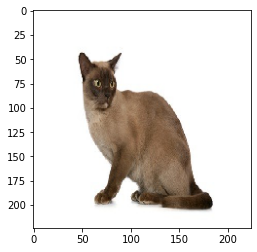

In [18]:
plt.imshow(cat_image_original)

In [19]:
predictions = vgg16_model.predict(cat_image_preprocessded)

In [20]:
predictions.shape

(1, 1000)

In [21]:
predicted_class = decode_predictions (predictions, top=1)

In [22]:
predicted_class

[[('n02123597', 'Siamese_cat', 0.97724336)]]

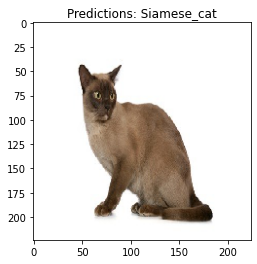

In [24]:
plt.imshow(cat_image_original)
predicted_class_name = predicted_class[0][0][1]
_ = plt.title("Predictions: " + predicted_class_name)